In [1]:
from PIL import Image
import numpy as np
#打开文件
anticode = Image.open("anticode_257.png")
image=Image.open("coded_257.png")
#创建新对象
width, height = image.size
new_image = Image.new("L", (width, height))
value=np.zeros((width, height))

In [2]:
#主要过程
for x in range(width):
    for y in range(height):
        #历遍每一个image中的像素点
        pixel_value = image.getpixel((x, y))#判断是否存在值
        if pixel_value > 50:
            for x1 in range(width):
                for y1 in range(height):
                    x2 = x + (x1 - width // 2)
                    y2 = y + (y1 - height // 2)#判断是否在图像内
                    if 0 <= x2 < width and 0 <= y2 < height:
                        fpixel_value = anticode.getpixel((x1, y1))
                        if pixel_value > 150:#为了二值化做出的妥协
                            value[x2][y2] += 2 * (fpixel_value / 10)
                        else:
                            value[x2][y2] += fpixel_value / 10
    print(f"Processing pixel at ({x})")

Processing pixel at (0)
Processing pixel at (1)
Processing pixel at (2)
Processing pixel at (3)
Processing pixel at (4)
Processing pixel at (5)
Processing pixel at (6)
Processing pixel at (7)
Processing pixel at (8)
Processing pixel at (9)
Processing pixel at (10)
Processing pixel at (11)
Processing pixel at (12)
Processing pixel at (13)
Processing pixel at (14)
Processing pixel at (15)
Processing pixel at (16)
Processing pixel at (17)
Processing pixel at (18)
Processing pixel at (19)
Processing pixel at (20)
Processing pixel at (21)


KeyboardInterrupt: 

In [ ]:
print(value)

In [4]:
min_val = np.min(value)
max_val = np.max(value)
value = np.round(value - min_val) / (max_val - min_val) * 250#归一化
for x in range(width):
    for y in range(height):
        new_image.putpixel((x, y), int(value[x][y]))#写入计算得到的值

In [ ]:
new_image.save("final33.png")

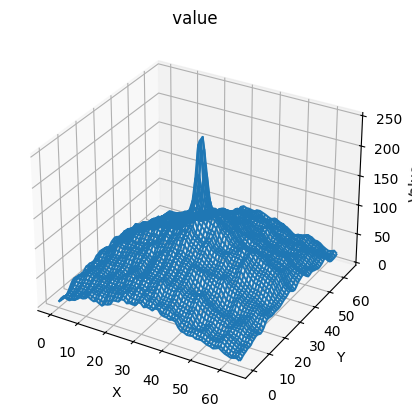

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# 创建网格坐标
X, Y = np.meshgrid(np.arange(len(value[0])), np.arange(len(value)))

# 绘制三维图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, value, rstride=1, cstride=1)

# 设置坐标轴标签和标题
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Value')
ax.set_title(' value ')

# 显示图表
plt.show()